# Bài 1:

Gọi n là số công nhân đưa vào nhóm huấn luyện.

$\phi_1$ là độ lệch chuẩn của nhóm 1

$\phi_2$ là độ lệch chuẩn của nhóm 2

ta có :

$1.96* \sqrt{\frac{\phi_1^2}{n} + \frac{\phi_2^2}{n}}$ = 1

Vì độ biến thiên 2 phương pháp là như nhau nên :

$\phi_1 = \phi_2=\phi$

ta có:

$4*\phi =8$

=> $\phi=2$

thay vào công thức trên ta được:

n=31


In [18]:
import numpy as np
from scipy import stats
def calculate_sample_size(sigma1, sigma2, delta, confidence=0.95):
    z_score = stats.norm.ppf(1 - (1 - confidence) / 2)
    variance_sum = sigma1**2 + sigma2**2
    sample_size = (z_score**2 * variance_sum) / delta**2
    return int(np.ceil(sample_size))
# Độ lệch chuẩn của từng nhóm (điều này cần được cung cấp hoặc ước lượng từ dữ liệu thực tế)
sigma1 =  2 # Độ lệch chuẩn của nhóm 1
sigma2 =  2 # Độ lệch chuẩn của nhóm 2
# Sự khác biệt trung bình mong muốn
delta = 1
# Tính toán số lượng công nhân cần thiết cho mỗi nhóm
sample_size = calculate_sample_size(sigma1, sigma2, delta)
# Hiển thị kết quả
print(f"Số lượng công nhân cần đưa vào mỗi nhóm: {sample_size}")


Số lượng công nhân cần đưa vào mỗi nhóm: 31


# Bài 2:

In [19]:
import scipy.stats as stats
import numpy as np

desired_margin_of_error = 20  
confidence_level = 0.99 
std_dev_estimate = 58 

z_score = stats.norm.ppf((confidence_level + 1) / 2)  # Tính z-score
sample_size = ((z_score * std_dev_estimate) / desired_margin_of_error) ** 2

print(f"Số lượng tài khoản cần được chọn mẫu: {np.ceil(sample_size)}")


Số lượng tài khoản cần được chọn mẫu: 56.0


# Bài 3:

### a.  Đọc file dữ liệu PISA_VN_2015_forTest.csv và thực hiện: 


- Cho biết bảng dữ liệu có bao nhiêu dòng và bao nhiêu cột? 


In [20]:
import  pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('PISA_VN_2015_forTest.csv')
df.head(5)



,CNTSCHID,CNT,STRATUM,SCHSIZE,CLSIZE,STRATIO,SCHLTYPE,REGION,OECD,AGE,...,PV1SCIE,PV1SCEP,PV1SCED,PV1SCID,PV1SKCO,PV1SKPE,PV1SSPH,PV1SSLI,PV1SSES,AREA
0,70400001,VNM,VNM0313,883,18.0,22.075,3.0,SOUTH,0,15.58,...,475.612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,URBAN
1,70400001,VNM,VNM0313,883,18.0,22.075,3.0,SOUTH,0,15.92,...,450.320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,URBAN
2,70400001,VNM,VNM0313,883,18.0,22.075,3.0,SOUTH,0,15.42,...,405.787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,URBAN
3,70400001,VNM,VNM0313,883,18.0,22.075,3.0,SOUTH,0,15.58,...,462.968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,URBAN
4,70400001,VNM,VNM0313,883,18.0,22.075,3.0,SOUTH,0,15.92,...,453.736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,URBAN


- Cho biết thông tin về các cột dữ liệu và kiểu của từng cột trong bảng 

In [21]:
df.describe()

,CNTSCHID,SCHSIZE,CLSIZE,STRATIO,SCHLTYPE,OECD,AGE,ST004D01T,ISCEDL,ISCEDD,...,PV1READ,PV1SCIE,PV1SCEP,PV1SCED,PV1SCID,PV1SKCO,PV1SKPE,PV1SSPH,PV1SSLI,PV1SSES
count,5.826000e+03,5826.000000,5792.000000,5826.000000,5791.000000,5826.0,5826.000000,5826.000000,5826.000000,5826.000000,...,5826.000000,5826.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.040010e+07,1082.350669,40.568198,16.497072,2.849422,0.0,15.775740,1.478201,2.945417,1.094404,...,489.880197,524.811228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.305672e+01,580.660172,7.896794,5.381542,0.527761,0.0,0.286971,0.499567,0.227184,0.424179,...,70.648586,74.951479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.040000e+07,113.000000,13.000000,4.314300,1.000000,0.0,15.330000,1.000000,2.000000,1.000000,...,107.075000,292.713000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.040005e+07,650.000000,38.000000,14.024400,3.000000,0.0,15.500000,1.000000,3.000000,1.000000,...,442.459000,470.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.040010e+07,1090.000000,38.000000,16.627200,3.000000,0.0,15.750000,1.000000,3.000000,1.000000,...,489.483500,523.879500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.040014e+07,1419.000000,43.000000,18.982800,3.000000,0.0,16.000000,2.000000,3.000000,1.000000,...,537.626000,574.776000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7.040019e+07,4016.000000,53.000000,38.651200,3.000000,0.0,16.250000,2.000000,3.000000,3.000000,...,744.150000,807.332000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Cho biết các dữ liệu thiếu 


In [22]:
print(df.isnull())
print("Tống số giá trị bị thiếu: ", df.isnull().sum().sum())

      CNTSCHID    CNT  STRATUM  SCHSIZE  CLSIZE  STRATIO  SCHLTYPE  REGION  \
0        False  False    False    False   False    False     False   False   
1        False  False    False    False   False    False     False   False   
2        False  False    False    False   False    False     False   False   
3        False  False    False    False   False    False     False   False   
4        False  False    False    False   False    False     False   False   
...        ...    ...      ...      ...     ...      ...       ...     ...   
5821     False  False    False    False   False    False     False   False   
5822     False  False    False    False   False    False     False   False   
5823     False  False    False    False   False    False     False   False   
5824     False  False    False    False   False    False     False   False   
5825     False  False    False    False   False    False     False   False   

       OECD    AGE  ...  PV1SCIE  PV1SCEP  PV1SCED  PV1SCID  PV

- Trực quan hóa dữ liệu bằng ít nhất 3 loại biểu đồ và nhận xét về các biểu đồ đó 

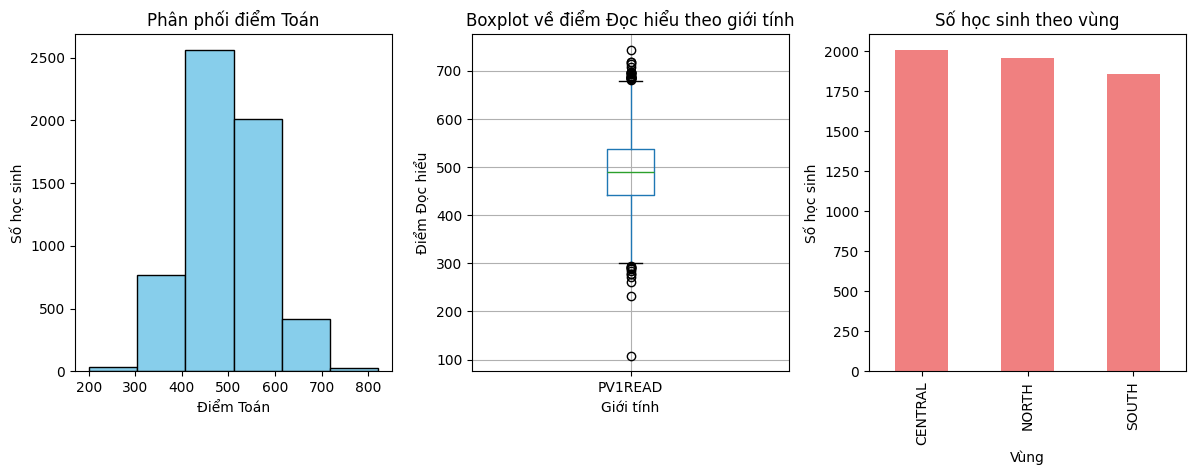

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
df['PV1MATH'].plot(kind='hist', bins=6, edgecolor='black', color='skyblue')
plt.title('Phân phối điểm Toán')
plt.xlabel('Điểm Toán')
plt.ylabel('Số học sinh')

plt.subplot(1, 5, 2)
df.boxplot(column='PV1READ')
plt.title('Boxplot về điểm Đọc hiểu theo giới tính')
plt.suptitle('')  
plt.xlabel('Giới tính')
plt.ylabel('Điểm Đọc hiểu')

plt.subplot(1, 5, 3)
df['REGION'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Số học sinh theo vùng')
plt.xlabel('Vùng')
plt.ylabel('Số học sinh')

plt.tight_layout()
plt.show()


### b. Tự viết các hàm tính Trung binh (mean), Độ lệch chuẩn (standard deviation) và khoảng dữ liệu (range) và áp dụng các hàm này với cột dữ liệu pv1MATH.

In [24]:
def custom_mean(data):
    return data.mean()

def custom_std_dev(data):
    return data.std()

def custom_range(data):
    return data.max() - data.min()

print(f"Điểm Toán trung bình: {custom_mean(df['PV1MATH'])}")
print(f"Điểm Toán độ lệch chuẩn: {custom_std_dev(df['PV1MATH'])}")
print(f"Điểm Toán phạm vi: {custom_range(df['PV1MATH'])}")

Điểm Toán trung bình: 496.08080621352553
Điểm Toán độ lệch chuẩn: 81.53181908615629
Điểm Toán phạm vi: 618.4870000000001


### c. Dựa vào dữ liệu cột Gender, bạn hãy thực hiện đếm số lượng học sinh Nam (Boys) và học sinh Nữ (Girls) và vẽ đồ thị Pie để so sánh mối tương quan giữa Boy và Girl.

In [25]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Gender
Girls    3040
Boys     2786
Name: count, dtype: int64


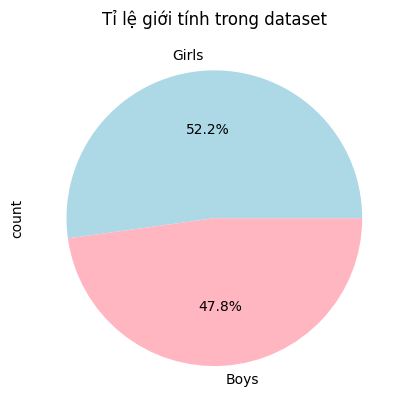

In [26]:
plt.figure()
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightpink'])
plt.title('Tỉ lệ giới tính trong dataset')
plt.show()

### d. Bạn hãy liệt kê các học sinh có điểm Toán (pv1MATH) cao nhất và các học sinh có điểm Khoa học (pv1SCIE) thấp nhất, lưu kết quả này vào 1 file csv. 

In [27]:
highest_math_score = df[df['PV1MATH'] == df['PV1MATH'].max()]
lowest_science_score = df[df['PV1SCIE'] == df['PV1SCIE'].min()]

highest_lowest_scores = pd.concat([highest_math_score, lowest_science_score])
highest_lowest_scores.to_csv('loss.csv', index=False)

### e. Phân tích mỗi tương quan giữa các đặc trưng và xác định các đặc trưng quan trọng trong bộ dữ liệu này, trực quan bằng các hình vẽ. 

In [28]:
import pandas as pd
import seaborn as sns


df_numeric = df.select_dtypes(include=['number'])
# xử lý dữ liệu thiếu
df_numeric = df_numeric.dropna(axis=1, thresh=5000)
df_numeric = df_numeric.fillna(df_numeric.mean())

correlation_matrix = df_numeric.corr()
high_correlation_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] >= 0.7 :
            high_correlation_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j]))

# Print the pairs
for pair in high_correlation_pairs:
    if str(pair[0]) != str(pair[1]):
        print(f"cặp: {pair}, Correlation: {correlation_matrix.loc[pair[0], pair[1]]}")


cặp: ('ISCEDD', 'ISCEDO'), Correlation: 1.0000000000000002
cặp: ('PARED', 'MISCED'), Correlation: 0.7855492046804021
cặp: ('PARED', 'FISCED'), Correlation: 0.8623003264921789
cặp: ('PARED', 'HISCED'), Correlation: 0.9758418724389419
cặp: ('PARED', 'ESCS'), Correlation: 0.8381780756711937
cặp: ('HEDRES', 'HOMEPOS'), Correlation: 0.7601627425133892
cặp: ('HEDRES', 'HEDRES.1'), Correlation: 1.0
cặp: ('MISCED', 'HISCED'), Correlation: 0.794061603155819
cặp: ('MISCED', 'ESCS'), Correlation: 0.722405803145823
cặp: ('FISCED', 'HISCED'), Correlation: 0.8826812945493694
cặp: ('FISCED', 'ESCS'), Correlation: 0.7591639342413905
cặp: ('HISCED', 'ESCS'), Correlation: 0.8366329712754694
cặp: ('WEALTH', 'ESCS'), Correlation: 0.7128206166465273
cặp: ('WEALTH', 'ICTRES'), Correlation: 0.8770271696947128
cặp: ('WEALTH', 'HOMEPOS'), Correlation: 0.9100807798429043
cặp: ('ESCS', 'HOMEPOS'), Correlation: 0.7703082409852328
cặp: ('ICTRES', 'HOMEPOS'), Correlation: 0.8519094483236516
cặp: ('HOMEPOS', 'HEDRES

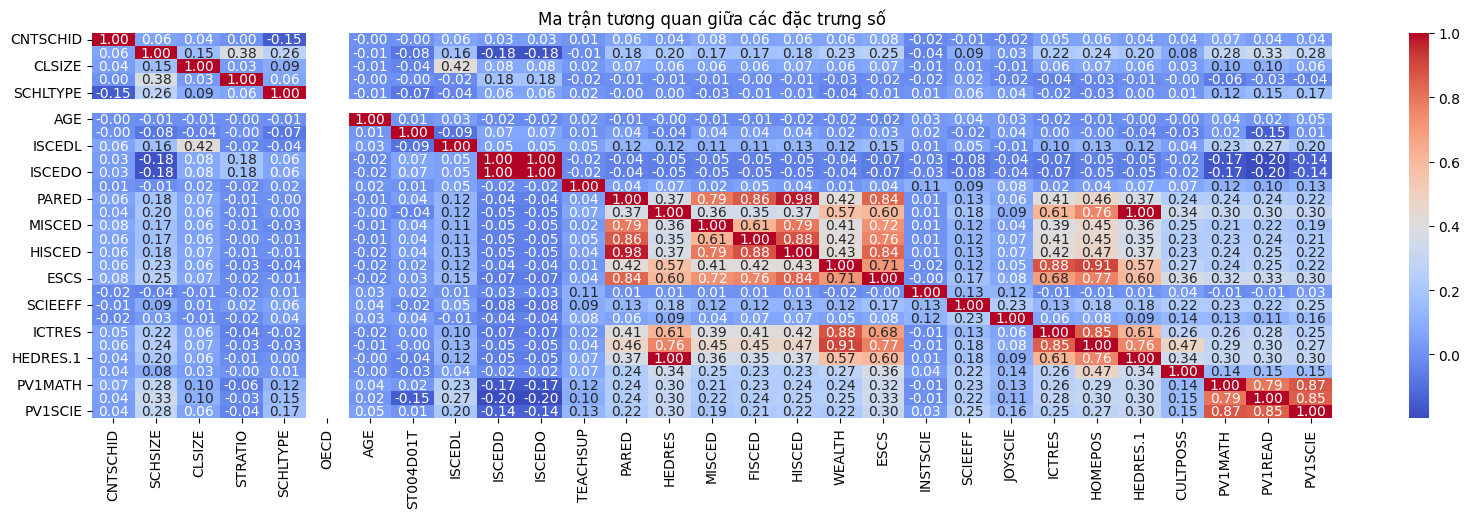

In [29]:

plt.figure(figsize=(20, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các đặc trưng số')
plt.show()

### f. Thống kê để hoàn thành bảng số liệu dưới đây, từ đó trực quan hóa dữ liệu Bảng 1 bằng đồ thị Bar. 

In [30]:
region_counts = df['REGION'].value_counts()
print(region_counts)

REGION
CENTRAL    2006
NORTH      1958
SOUTH      1862
Name: count, dtype: int64


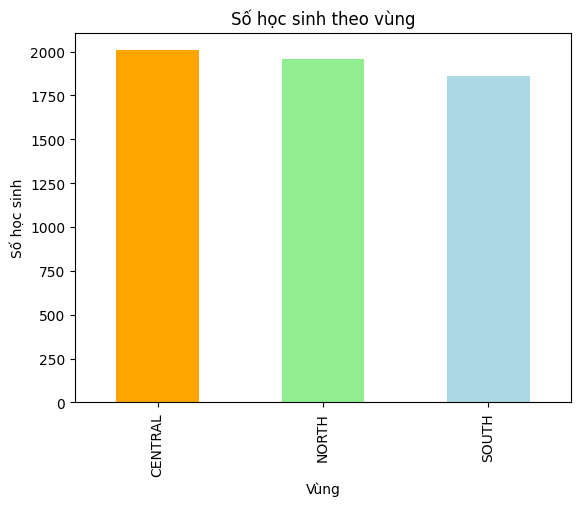

In [31]:
plt.figure()
region_counts.plot(kind='bar', color=['orange', 'lightgreen', 'lightblue'])
plt.title('Số học sinh theo vùng')
plt.xlabel('Vùng')
plt.ylabel('Số học sinh')
plt.show()

# Bài 4:

### sử dụng mô hình là hồi quy với :
Số phút = βo + β1Units

$$
\text{β1} = \frac{\sum_{i=1}^{n} (x[i] - \bar{x})(y[i] - \bar{y})}{\sum_{i=1}^{n} (x[i] - \bar{x})^2} 
$$


In [32]:
def linear_regression(x, y):
    """solution :
    tính trung bình của x và y
    
    tính β1 = 
        sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n)) 
                            /
        sum((x[i] - mean_x)**2 for i in range(n))
        
    tính β0 = mean(y) - β1 * mean(x)
    
    if you want cov:
        sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n)) / (n - 1)
    if you want cor:
        tính độ lệch chuẩn của x và y.
        cov(x, y) / (std_dev_x * std_dev_y)
    
    """
    n = len(x)
    
    mean_x = sum(x) / n
    mean_y = sum(y) / n
    
    numerator = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n))
    denominator = sum((x[i] - mean_x)**2 for i in range(n))
    
    beta1 = numerator / denominator
    
    beta0 = mean_y - beta1 * mean_x
    
    return beta0, beta1

def predict_minutes(beta0, beta1, units):
    return beta0 + beta1 * units # ct Số phút = βo + β1Units

In [33]:
units = [3, 4, 1, 2, 5, 6, 4, 8, 9, 10, 10, 6, 7, 8, 9]
minutes = [49, 64, 23, 29, 87, 96, 74, 145, 154, 166, 97, 109, 111, 149, 145]

beta0, beta1 = linear_regression(units, minutes)
print(f"βo: {beta0}, β1: {beta1}")

βo: 10.926387315968313, β1: 14.501132502831252


In [34]:
new_units = int(input("Nhập số linh kiện cần sửa chữa (Units): "))
predicted_minutes = predict_minutes(beta0, beta1, new_units)
print(f"Dự đoán số phút gọi vào tổng đài: {predicted_minutes:.2f} phút")


Dự đoán số phút gọi vào tổng đài: 83.43 phút


# End